In [1]:
import gensim.downloader as api 



In [2]:
wv = api.load('word2vec-google-news-300')

In [3]:
wv.similarity('google','facebook')

0.50059026

In [4]:
wv_good = wv['good']
wv_great = wv['great']

In [5]:
wv_great.shape

(300,)

In [6]:
import pandas as pd

df = pd.read_csv('Fake_Real_Data.csv')

In [7]:
df.shape

(9900, 2)

In [8]:
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [9]:
df['label_num'] = df.label.map({
    'Fake':0,
    "Real":1
})

In [12]:
df.head(4)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0


In [13]:
import spacy 
nlp = spacy.load("en_core_web_lg")

In [18]:
def preprocess_and_vectorize(text):
    doc = nlp(text)
    
    filtered_tokens = []
    
    for token in doc:
        if token.is_punct or token.is_stop:
            continue 
        
        filtered_tokens.append(token.lemma_)
        
    return wv.get_mean_vector(filtered_tokens)

In [19]:
df['vector'] = df['Text'].apply(lambda x: preprocess_and_vectorize(x))

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    df.vector.values,
    df.label_num,
    random_state=2022,
    stratify=df.label_num
)


##### Reshaping the X_train and X_test so as to fit for model 

In [21]:
import numpy as np

In [22]:
print('Shape of X_train before reshaping:',X_train.shape)
print('Shape of X_test before reshaping:',X_test.shape)

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

print('Shape of X_train after reshaping:',X_train_2d.shape)
print('Shape of X_test after reshaping:',X_test_2d.shape)

Shape of X_train before reshaping: (7425,)
Shape of X_test before reshaping: (2475,)
Shape of X_train after reshaping: (7425, 300)
Shape of X_test after reshaping: (2475, 300)


### Machine Learning Model

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

#1 creating a gradient boosting model object 
clf = GradientBoostingClassifier()

#2 fit with all train_embeddings and y_train 
clf.fit(X_train_2d,y_train)

#3 get the prediction 
y_pred = clf.predict(X_test_2d)

#4 print the classification method 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1250
           1       0.98      0.99      0.98      1225

    accuracy                           0.98      2475
   macro avg       0.98      0.98      0.98      2475
weighted avg       0.98      0.98      0.98      2475



# confusion matrix for best model 

Text(95.72222222222221, 0.5, 'Truth')

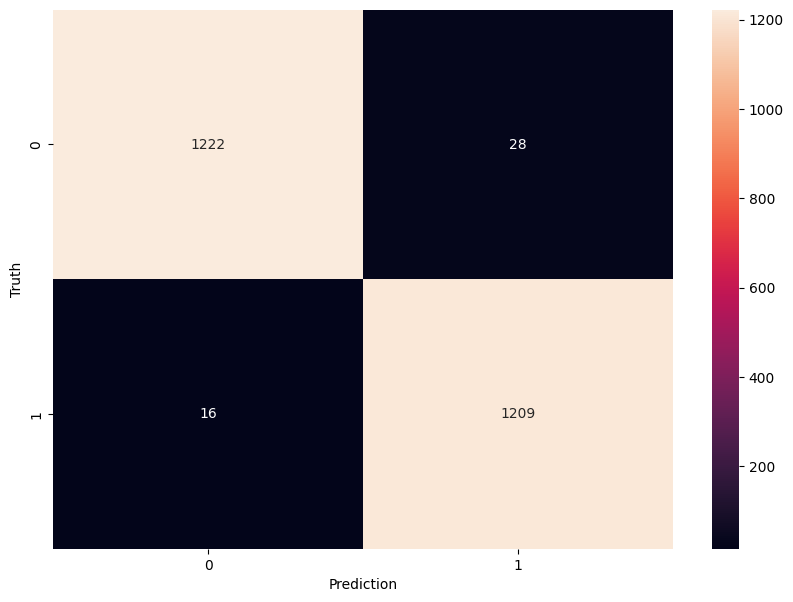

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm 

from matplotlib import pyplot as plt 
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel('Truth')
